# 1. Install and Import Dependencies

In [25]:
!pip3 install torch torchvision torchaudio


In [26]:
!pip install opencv-python

In [27]:
!git clone https://github.com/ultralytics/yolov5
!/Library/Frameworks/Python.framework/Versions/3.10/bin/python3 -m pip install --upgrade pip

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [28]:
!cd yolov5 
!pip install -r requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [29]:
!pip install -r https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt


In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

# 2. Load Model

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /Users/shrutigoyal/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-8-19 Python-3.10.2 torch-1.12.1 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [3]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# 3. Make Detections with Images

In [4]:
img = 'https://ultralytics.com/images/zidane.jpg'

In [5]:
results = model(img)
results.print()

image 1/1: 720x1280 2 persons, 2 ties
Speed: 523.6ms pre-process, 273.7ms inference, 2.1ms NMS per image at shape (1, 3, 384, 640)


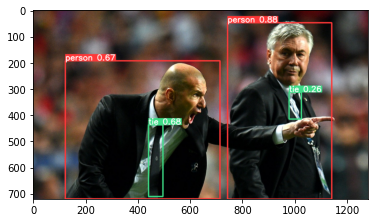

In [6]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [7]:
results.render()

[array([[[72, 48, 38],
         [74, 50, 40],
         [73, 51, 40],
         ...,
         [56, 21, 25],
         [55, 19, 21],
         [51, 15, 17]],
 
        [[71, 47, 37],
         [71, 47, 37],
         [70, 48, 37],
         ...,
         [55, 20, 24],
         [52, 16, 18],
         [47, 11, 13]],
 
        [[75, 51, 41],
         [73, 49, 39],
         [70, 48, 37],
         ...,
         [56, 20, 24],
         [52, 16, 20],
         [48, 12, 16]],
 
        ...,
 
        [[40, 43, 48],
         [41, 44, 49],
         [40, 43, 48],
         ...,
         [35, 49, 49],
         [35, 49, 49],
         [36, 50, 50]],
 
        [[39, 42, 49],
         [39, 42, 49],
         [39, 42, 49],
         ...,
         [35, 49, 50],
         [35, 49, 50],
         [36, 50, 51]],
 
        [[38, 41, 48],
         [38, 41, 48],
         [38, 41, 48],
         ...,
         [35, 49, 50],
         [35, 49, 50],
         [36, 50, 51]]], dtype=uint8)]

# 4. Real Time Detections

In [8]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# 5. Train from scratch

In [9]:
import uuid   # Unique identifier
import os
import time

In [10]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 5

In [ ]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [50]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data/images/awake.fbd566be-1fbe-11ed-bd69-6030d47955c4.jpg


In [51]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

data/images/awake.fbda2bb8-1fbe-11ed-bd69-6030d47955c4.jpg
data/images/awake.fbda2e74-1fbe-11ed-bd69-6030d47955c4.jpg
data/images/awake.fbda314e-1fbe-11ed-bd69-6030d47955c4.jpg
data/images/awake.fbda3428-1fbe-11ed-bd69-6030d47955c4.jpg
data/images/awake.fbda361c-1fbe-11ed-bd69-6030d47955c4.jpg
data/images/drowsy.fbda37e8-1fbe-11ed-bd69-6030d47955c4.jpg
data/images/drowsy.fbda3928-1fbe-11ed-bd69-6030d47955c4.jpg
data/images/drowsy.fbda3a5e-1fbe-11ed-bd69-6030d47955c4.jpg
data/images/drowsy.fbda3b8a-1fbe-11ed-bd69-6030d47955c4.jpg
data/images/drowsy.fbda3d2e-1fbe-11ed-bd69-6030d47955c4.jpg


In [52]:
!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...
remote: Enumerating objects: 2090, done.
remote: Counting objects: 100% (104/104), done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 2090 (delta 43), reused 79 (delta 34), pack-reused 1986
Receiving objects: 100% (2090/2090), 232.91 MiB | 4.74 MiB/s, done.
Resolving deltas: 100% (1226/1226), done.


In [53]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 4.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 4.1 MB/s eta 0:00:0000:0100:01m
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 MB 4.5 MB/s eta 0:00:0000:0100:01
  Created wheel for lxml: filename=lxml-4.9.1-cp310-cp310-macosx_10_9_universal2.whl size=3021315 sha256=44046ab713393da549bb01945d1ac61c8eafe58535f923764b6595bbbf3804ff
  Stored in directory: /Users/shrutigoyal/Library/Caches/pip/wheels/a4/ec/7b/8acde6da24b5aabeee049213d5bec12d1e9214d3cae276387b
Successfully built lxml
  Attempting uninstall: lxml
    Found existing installation: lxml 4.8.0
    Uninstalling lxml-4.8.0:
      Successfully uninstalled lxml-4.8.0


In [56]:
!cd yolov5 && python3 train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 11 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (11/11), 34.53 KiB | 579.00 KiB/s, done.
From https://github.com/ultralytics/yolov5
   1cd3e75..4a8ab3b  master     -> origin/master
github: ⚠️ YOLOv5 is out of date by 2 commits. Use `git pul

# 6. Load Custom Model

In [57]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp15/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /Users/shrutigoyal/.cache/torch/hub/master.zip
YOLOv5 🚀 2022-8-19 Python-3.10.2 torch-1.12.1 CPU



Exception: [Errno 2] No such file or directory: 'yolov5/runs/train/exp15/weights/last.pt'. Cache may be out of date, try `force_reload=True` or see https://github.com/ultralytics/yolov5/issues/36 for help.

In [58]:
img = os.path.join('data', 'images', 'awake.c9a24d48-e1f6-11eb-bbef-5cf3709bbcc6.jpg')

In [59]:
results = model(img)

FileNotFoundError: [Errno 2] No such file or directory: 'data/images/awake.c9a24d48-e1f6-11eb-bbef-5cf3709bbcc6.jpg'

In [60]:
results.print()

image 1/1: 720x1280 2 persons, 2 ties
Speed: 538.9ms pre-process, 368.6ms inference, 2.3ms NMS per image at shape (1, 3, 384, 640)


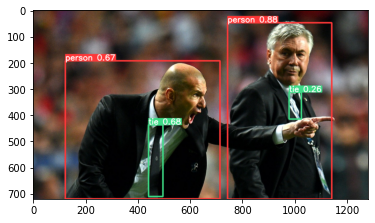

In [61]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [62]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 